In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

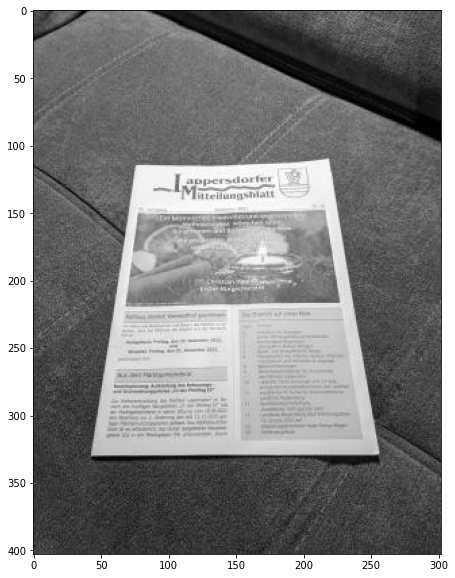

In [42]:
img = cv2.imread('../Data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

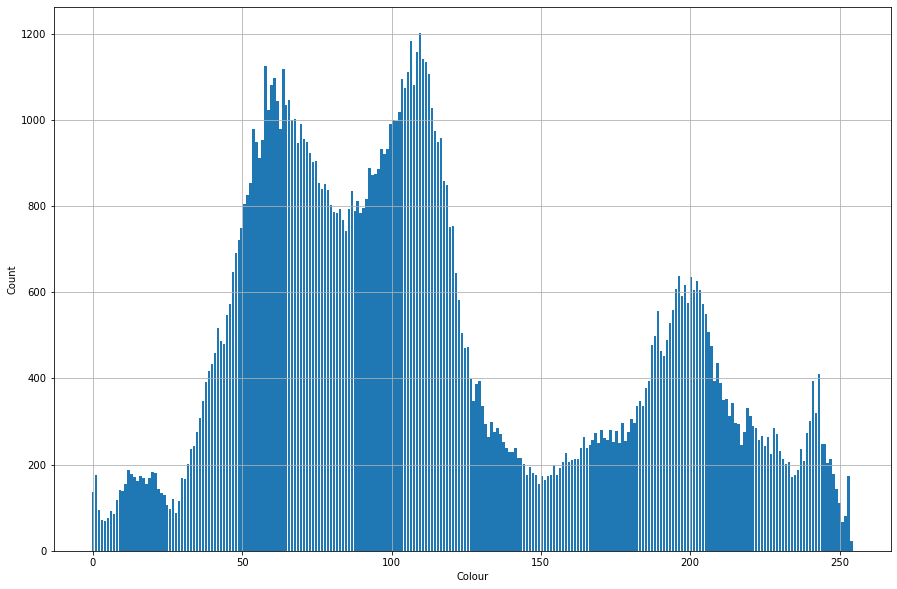

In [43]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [57]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

#
p = h[0]/num_pixels

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = img[img>=th]
    # Extract the image pixels corresponding to the background
    background = img[img<th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = sum(p[th:256])
    omega_b = sum(p[0:th])
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma_f = np.var(foreground)
    sigma_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f * sigma_f + omega_b * sigma_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)


Optimal threshold 140


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f611665f460>)

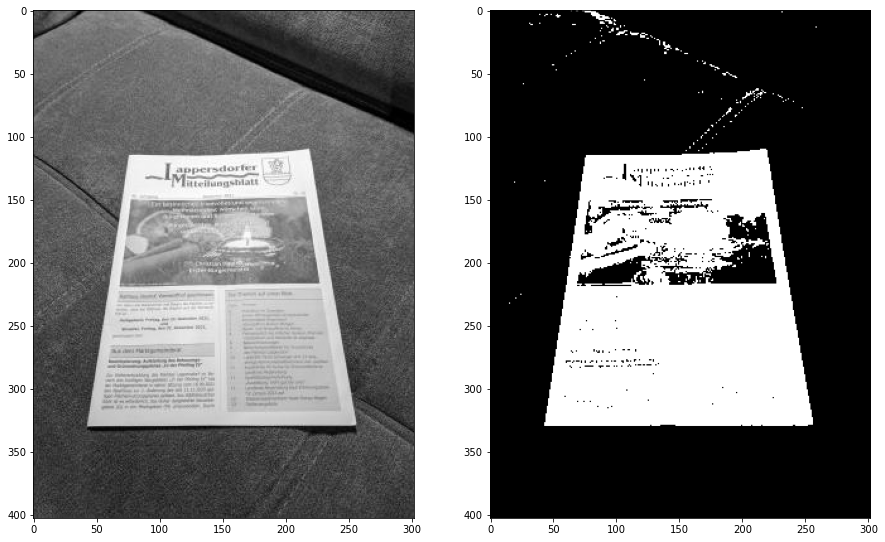

In [58]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

139.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f6116d05940>)

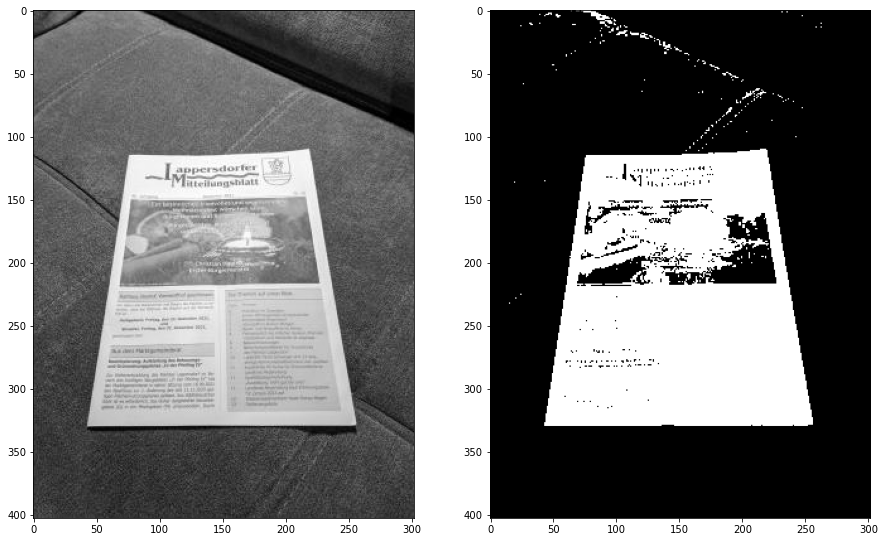

In [51]:
# OpenCV Otsu's thresholding
ret, otsu_th = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
print(ret)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(otsu_th, cmap='gray')

**Answers**

    Looking at the computed histogram, could it be considered bimodal?
    Looking at the computed histogram, what binarization threshold would you chose? Why?
    Looking at the resulting (thresholded) image, is the text binarization (detection) good?

